# Introducción a la Resolución de Ecuaciones Diferenciales Ordinarias

<a name='section_0'></a>
<h2 style="border:1px; border-style:solid; padding: 0.5em; color: #FFFFFF; background-color: #3a62f2">0. Descripción General</h2>

## Hey

### Hey 2

En este tema, vamos a estudiar cómo resolver ecuaciones diferenciales ordinarias (EDOs) de manera numérica utilizando Python. Para ello, se abordarán los siguientes puntos:

- Introducción al concepto de ecuación diferencial ordinaria a través de un sencillo ejemplo.
- Resolución de EDOs concretas mediante el método de Euler explícito.
- Método general para resolver ecuaciones diferenciales de manera numérica. Utilización de la librería *scipy*
- Ejemplos de ecuaciones diferenciales ordinarias de interés en la física, como el oscilador armónico o la velocidad límite de un paracaidista.

<h3>Tabla de Contenidos</h3>
<table style="width:100%">
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_1">1. Ecuaciones diferenciales: un primer ejemplo</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_2">2. Discretización de la ecuación diferencial: Euler explícito</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_3">3. Formulación general del método Euler explícito</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_4">4. Ecuaciones diferenciales con scipy</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_5">5. Oscilador Armónico</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_6">6. Paracaidista en caída libre: velocidad límite </a></td>
    </tr>
</table>

<h3>Importar librerías y configuración</h3>

*Ejecuta la siguiente celda para instalar todos los paquetes necesarios*


In [1]:
%pip install -q numpy scipy matplotlib ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
import scipy as sp
from scipy import integrate # Necesario en versiones antiguas de scipy
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

*Parámetros predeterminados para las figuras*

In [13]:
COLORS = ["#3a62f2", "#f23d4f", "#ff9736", "#3fe085", "#c48a51", "#57d4bb",
          "#9c5bf0", "#030203", "#949494", "#fa73b4", "#dbc746"]

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 18
large_size = 20

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=medium_size)          
plt.rc('xtick', labelsize=medium_size, direction='in')   
plt.rc('ytick', labelsize=medium_size, direction='in')
plt.rc('xtick.major', size=8, pad=7.5)
plt.rc('ytick.major', size=8, pad=7.5)
plt.rc('ytick', labelsize=medium_size, direction='in')    
plt.rc('legend', fontsize=medium_size, framealpha=0.8)    
plt.rc('axes', titlesize=large_size, labelsize=large_size, labelpad=6.0)     
plt.rc('lines', linewidth=2.5)      
plt.rc('figure', titlesize=large_size)   

<a name='section_1'></a>

<h2 style="border:1px; border-style:solid; padding: 0.5em; color: #FFFFFF; background-color: #3a62f2">1. Ecuaciones diferenciales: un primer ejemplo</h2>  

| [Top](#section_0) | [Previous Section](#section_0) | [Next Section](#section_2) |


Una ecuación diferencial es una ecuación que relaciona la función que queremos conocer, $y(t)$ (que depende de la variable independiente $t$), con sus derivadas. Por ejemplo, consideremos la ecuación diferencial

$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = y(t),$$

donde se relaciona la función $y(t)$ con su derivada primera. Para pensar en una posible solución a esta ecuación, vamos a interpretar esta relación. La ecuación nos dice que tenemos que encontrar una función $y(t)$ tal que, tras derivarla, seguimos teniendo la misma función. 

Si pensamos entre las funciones elementales conocidas, una clara candidata es la función exponencial. Por tanto, podemos proponer la siguiente solución

$$y(t) = e^t,$$

que cumple la ecuación diferencial ya que

$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = \frac{\mathrm{d}}{\mathrm{d}t}e^t = e^t = y(t).$$

Además, como la derivación es una operación lineal, podemos escribir una solución un poco más general como 

$$y(t) = Ce^{t},$$

donde $C$ es un número real. Esta función también es solución, ya que

$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = \frac{\mathrm{d}}{\mathrm{d}t}Ce^{t} = C\frac{\mathrm{d}}{\mathrm{d}t}e^{t} = Ce^{t} = y(t).$$

Por lo tanto, hemos encontrado que una solución a la ecuación diferencial $\mathrm{d}y/\mathrm{d}t = y$ es $y(t) = Ce^{t}$. De hecho, esta no es una única solución, ya que es válida para cualquier valor de $C$. Por lo tanto, en realidad, tenemos una familia de soluciones para los distintos valores de $C$ (que en la jerga de ecuaciones diferenciales se conocen como *curvas integrales*).

Para definir un valor de la constante, hay que indicar el valor de la función $y(t)$ en un instante de tiempo concreto. Físicamente, esto se puede corresponder a la posición inicial de un sistema (como cuando estiramos un muelle una pequeña cantidad y lo soltamos). A partir de esta posición inicial conocida, evolucionamos el sistema en el tiempo acorde a la ecuación diferencial que lo describe.

Para nuestro ejemplo concreto, podemos fijar el valor de $y(0) = 1$. De esta forma, despejamos la constante $C$, obteniendo que

$$y(0) = 1 = Ce^0 = C \Rightarrow C = 1.$$

Por tanto, la solución a la ecuación diferencial $\mathrm{d}y/\mathrm{d}t = y$ con condición inicial $y(0) = 1$ es 

$$y(t) = e^{t}.$$

Ahora cabría preguntarse, ¿hay más soluciones de esta ecuación diferencial? La respuesta es no, invocando un importante [resultado de existencia y unicidad de ecuaciones diferenciales ordinarias](https://es.wikipedia.org/wiki/Teorema_de_Picard-Lindel%C3%B6f), pero eso se verá con más detalle en el próximo curso. Por el momento, nos vale con saber que la exponencial es solución de esta ecuación diferencial.

En resumen, para el **problema del valor inicial** (formado por la ecuación diferencial y la condición inicial)

$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = y(t),$$

$$y(0) = 1,$$

se tiene la única solución

$$y(t) = e^{t}.$$

A continuación, vamos a representar gráficamente esta solución para el intervalo de tiempo $t \in [0, 3]$. Para ello, vamos a generar un vector de tiempos $t$ y un vector de valores de la función $y(t)$, y vamos a representarlos en utilizando la librería `matplotlib`.

In [14]:
t = np.arange(0, 3 + 0.5, 0.5) # 0 a 3 segundos con paso 0.5
y = np.exp(t) # y = e^t

Con la celda anterior, hemos definido un vector de tiempos con una diferencia $\Delta t = 0.5$ entre dos instantes temporales sucesivos. Esta discretización del tiempo es necesaria, ya que en el ordenador no podemos representar una función continua. Luego, para cada uno de estos valores de $t$, calculamos el valor de la función $y(t)$, y lo guardamos en un vector `y`. Numéricamente, obtendríamos

$$t = [0, 0.5, 1, ..., 2.5, 3],$$

$$y = [e^0, e^{0.5}, e^1, ..., e^{2.5}, e^3].$$

En general, esta discretización la denotaremos como $t_n = n\Delta t$, donde $n$ es un número entero, donde

$$t = [t_0, t_1, t_2, ..., t_{N-1}, t_N] = [0, \Delta t, 2 \Delta t, N \Delta t],$$

$$y = [y_0, y_1, y_2, ..., y_{N-1}, y_N] = [y(t_0), y(t_1), y(t_2), ..., y(t_{N-1}), y(t_N)].$$


Por tanto, en este caso, $t_n = n\Delta t = 0.5n$. En la siguiente celda representamos gráficamente la solución $y(t)$.

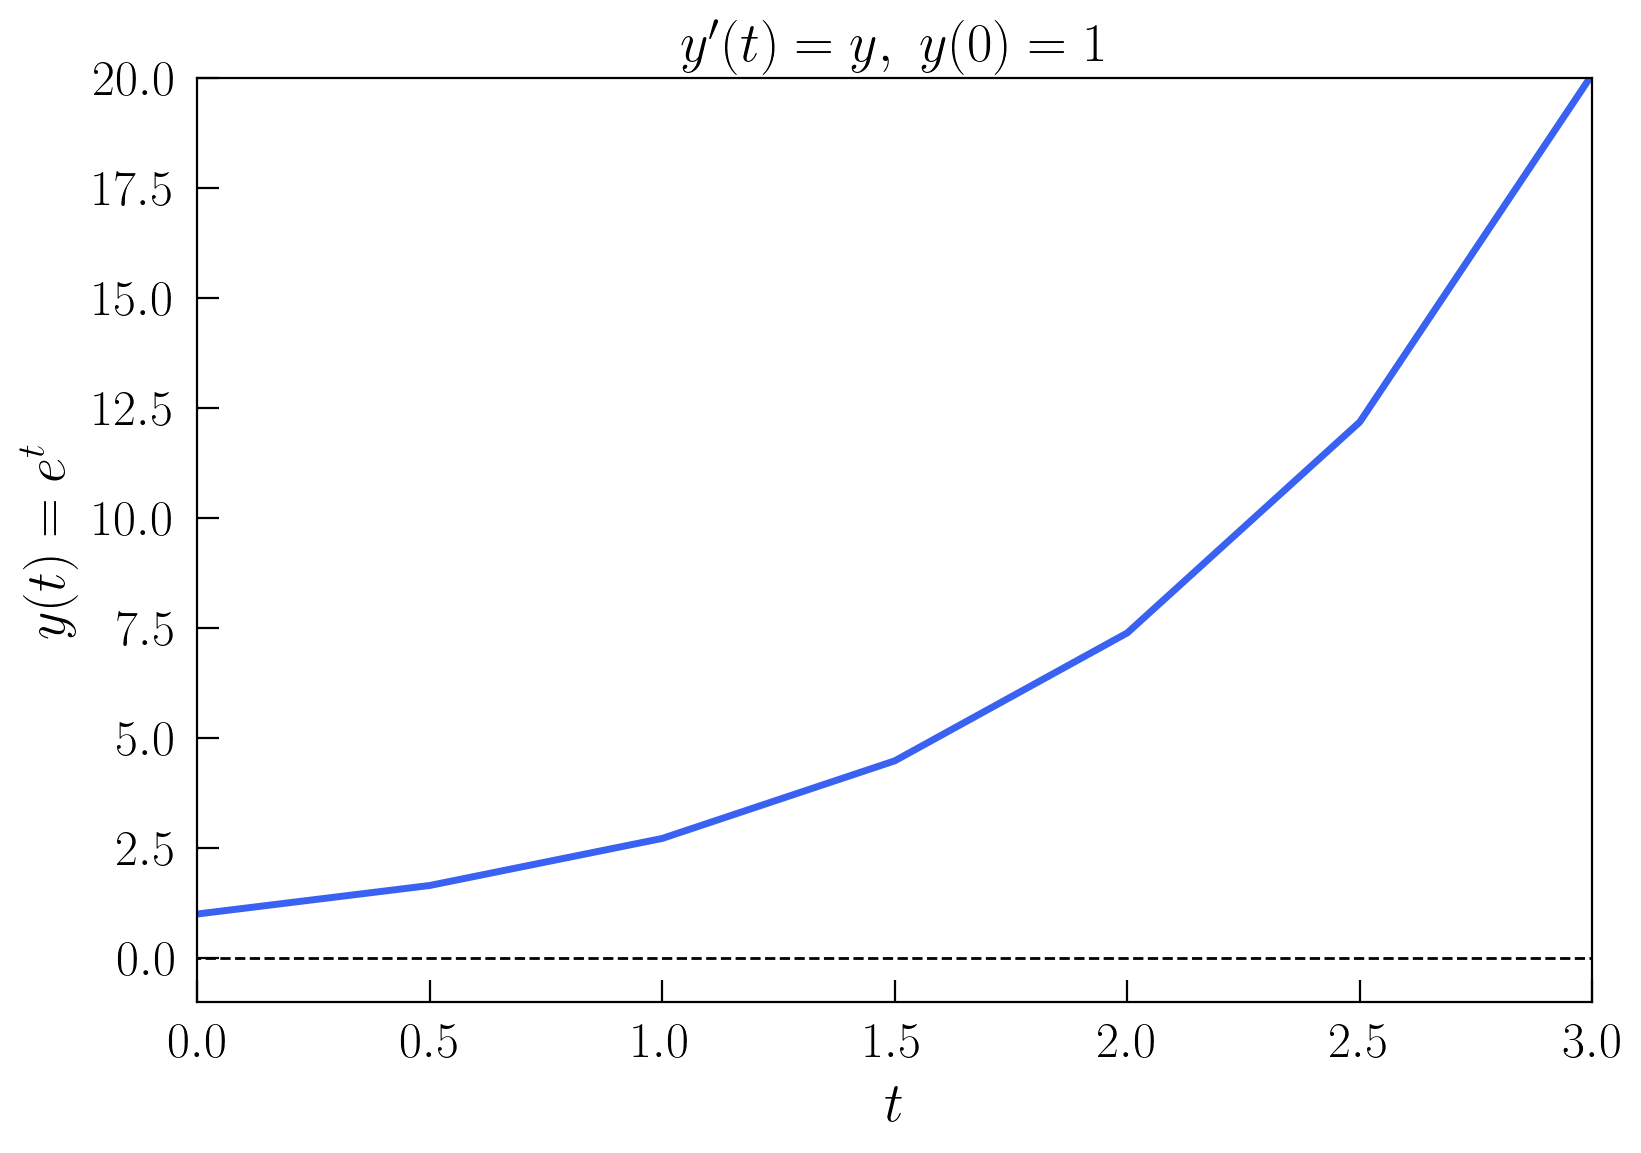

In [15]:
plt.figure()
ax = plt.axes(xlim=(0, 3), ylim=(-1, 20)) 
ax.plot(t, y, color = COLORS[0])  
ax.plot([t[0] - 1, t[-1] + 1], [0, 0], color = "black", lw=1, ls="--")   
ax.set_xlabel("$t$")
ax.set_ylabel("$ y(t) = e^t $")
ax.set_title("$y'(t) = y, \ y(0) = 1$")
plt.show()

Como el paso de tiempo es relativamente grande, la solución no se ve muy suave pues solo tenemos representados 7 puntos en el intervalo, que después se unen por segmentos rectos. Para mejorar la resolución, podemos hacer la misma representación con un paso de tiempo $\Delta t = 0.01$.

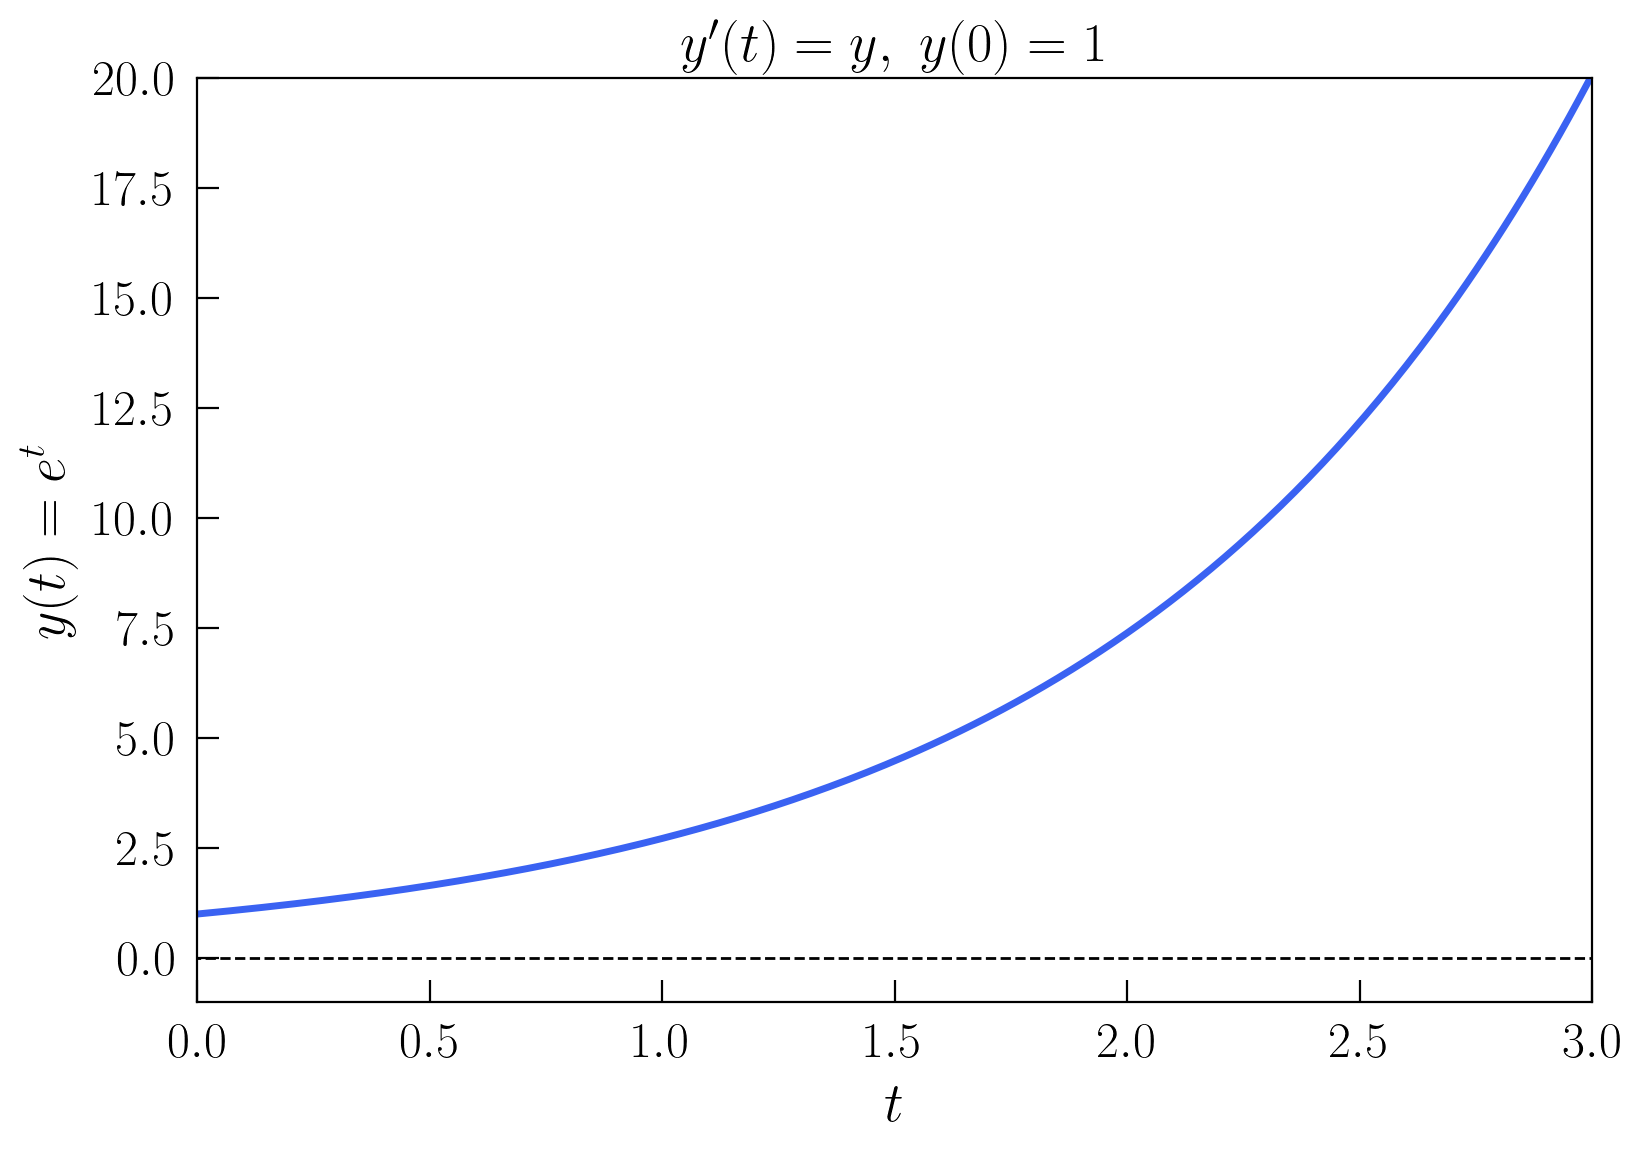

In [16]:
t = np.arange(0, 3 + 0.01, 0.01) # 0 a 3 segundos con paso 0.01
y = np.exp(t) # y = e^t

plt.figure()
ax = plt.axes(xlim=(0, 3), ylim=(-1, 20)) 
ax.plot(t, y, color = COLORS[0])  
ax.plot([t[0] - 1, t[-1] + 1], [0, 0], color = "black", lw=1, ls="--")   
ax.set_xlabel("$t$")
ax.set_ylabel("$ y(t) = e^t $")
ax.set_title("$y'(t) = y, \ y(0) = 1$")
plt.show()

Para ganar más intuición sobre ecuaciones diferenciales, vamos a considerar la EDO un poco más general definida por 

$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = \alpha y(t),$$

$$ y(0) = y_0,$$

que tiene como solución

$$y(t) = y_0e^{\alpha t},$$

ya que, al derivar la función $y(t) = y_0e^{\alpha t}$, un $\alpha$ baja del exponente y logramos satisfacer la ecuación diferencial.

En la siguiente celda, se va a representar una gráfica interactiva, donde se puede ver cómo varía la solución para distintas condiciones iniciales $y_0$ y distintos valores del parámetro $\alpha$. Para ello, vamos a utilizar la librería `ipywidgets`.

Prueba a cambiar los valores y observa cómo cambia la solución. ¿Qué ocurre si $\alpha$ es negativo? ¿Y si $\alpha = 0$?

In [17]:
def plot_euler(alpha=-2, y0=5):
    
    t = np.arange(0, 2 + 0.01, 0.01) # 0 a 2 segundos con paso 0.01
    y = y0 * np.exp(alpha * t) # y = y0e^(alpha * t)
    
    plt.figure()
    ax = plt.axes(xlim=(0, 2), ylim=(-3, 8))
    ax.plot([0, 2], [0, 0], color = "black", lw=1, ls="--")  
    ax.plot(t, y, color = COLORS[0]) 
    ax.plot(t[0], y[0], 'o', color = COLORS[0], clip_on=False, zorder=10)
    ax.set_xlabel("$t$")
    ax.set_ylabel("$ y(t) = y_0 e^{\\alpha t} $")
    ax.set_title("$ y'(t) = \\alpha y, \ y(0) = y_0$")
    plt.show()
    
interactive_plot = interactive(plot_euler, alpha=(-3, 2, 0.1),
                               y0 = (-2, 7, 0.1))
interactive_plot

interactive(children=(FloatSlider(value=-2.0, description='alpha', max=2.0, min=-3.0), FloatSlider(value=5.0, …

Tras haber estudiado la solución analítica de una clase sencilla de ecuaciones diferenciales, en el siguiente aportado vamos a ver cómo se pueden resolver numéricamente.

<a name='section_2'></a>

<h2 style="border:1px; border-style:solid; padding: 0.5em; color: #FFFFFF; background-color: #3a62f2">2. Discretización de la ecuación diferencial: Euler explícito</h2>  

| [Top](#section_0) | [Previous Section](#section_1) | [Next Section](#section_3) |


En el apartado anterior, estudiamos la ecuación diferencial

$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = f(t, y(t)),$$

para el caso donde $f(t, y(t)) = y(t).$ En este apartado, queremos estudiar cómo obtener una solución numérica para este tipo de ecuaciones. En este caso sencillo, además, conocemos la solución analítica, pero es muy frecuente no conocerla. Sin embargo, numéricamente sí es fácil simular la evolución de un sistema de ecuaciones diferenciales y esto nos permite analizar el comportamiento del sistema.

En este apartado vamos a utilizar el método de Euler explícito. Antes de mostrar la forma de este método, conviene recordar cómo se puede aproximar una derivada por *diferencias finitas*. El desarrollo de Taylor de una función $y(t)$ alrededor de un punto $t_0$ es

$$y(t) = y(t_0) + \frac{\mathrm{d}y}{\mathrm{d}t}(t_0)(t - t_0) + \frac{1}{2!}\frac{\mathrm{d}^2y}{\mathrm{d}t^2}(t_0)(t - t_0)^2 + \frac{1}{3!}\frac{\mathrm{d}^3y}{\mathrm{d}t^3}(t_0)(t - t_0)^3 + \cdots.$$

Si queremos aproximar la derivada $\frac{\mathrm{d}y}{\mathrm{d}t}(t)$ en el punto $t$, basta con sustitiur en el desarrollo anterior $t$ por $t+\Delta t$ y $t_0$ por $t$,

$$y(t + \Delta t) = y(t) + \frac{\mathrm{d}y}{\mathrm{d}t}(t)\Delta t + \frac{1}{2!}\frac{\mathrm{d}^2y}{\mathrm{d}t^2}(t)\Delta t^2 + \frac{1}{3!}\frac{\mathrm{d}^3y}{\mathrm{d}t^3}(t)\Delta t^3 + \cdots.$$

Despejando la derivada, tenemos

$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = \frac{y(t + \Delta t) - y(t)}{\Delta t} - \frac{1}{2!}\frac{\mathrm{d}^2y}{\mathrm{d}t^2}(t)\Delta t - \frac{1}{3!}\frac{\mathrm{d}^3y}{\mathrm{d}t^3}(t)\Delta t^2 - \cdots,$$

$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = \frac{y(t + \Delta t) - y(t)}{\Delta t} + O(\Delta t),$$

donde $O(\Delta t)$ indica cómo escala el término dominante del resto del desarrollo en el límite $\Delta t \to 0$. (Va como $\Delta t$ ya que, si por ejemplo $\Delta t = 0.1$, las potencias superiores son todavía menores, $\Delta t^2 = 0.01$, ...). Ahora, vamos a sustituir la derivada en la ecuación diferencial por este resultado que acabamos de obtener del desarrollo de Taylor y despejar $y(t + \Delta t)$

$$y(t + \Delta t) = y(t) + \Delta tf(t, y(t)) + O(\Delta t^2).$$

Imaginemos que conocemos la solución $y(t)$ en el punto $t = t_n$. Utilizando la expresión anterior,

$$y(t_{n} + \Delta t) = y(t_n) + \Delta tf(t_n, y(t_n)) + O(\Delta t^2),$$

y como $t_n = n\Delta t, t_{n+1} = (n+1)\Delta t$, tenemos

$$y(t_{n+1}) = y(t_n) + \Delta tf(t_n, y(t_n)) + O(\Delta t^2).$$

Es decir, que si ignoramos el resto de términos englobados en $O(\Delta t^2)$, podemos aproximar la solución en el punto $t_{n+1}$ por

$$y(t_{n+1}) \approx y(t_n) + \Delta tf(t_n, y(t_n)),$$

donde cometemos un error de orden $\Delta t^2$ (que implica que cuanto más pequeños sean los pasos de tiempo que tomamos, menor error tenemos). Es conveniente denotar a la aproximación anterior de la manera

$$y_{n+1} = y_n + \Delta tf(t_n, y_n),$$

donde $y_n$ es la **aproximación numérica** de la solución en el punto $t_n = n\Delta t$ (la notación $y(t_n)$ la reservamos para denotar a la solución exacta evaluada en el punto $t_n$). Este método se conoce como **método de Euler explícito**, donde conociendo $y_n$ podemos calcular $y_{n+1}$.

A continuación, vamos a ver cómo aplicarlo al caso anterior, donde el problema de EDOs venía dado por

$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = y(t).$$

$$y(0) = 1.$$

Con la notación de subíndices, la condición inicial se puede escribir como $y_0 = 1$. Para un instante $t_n$, y como $f(t, y) = y$, con el método de Euler tenemos

$$y_{n+1} = y_n + \Delta t y_n,$$

o, de manera más compacta

$$y_{n+1} = (1 + \Delta t)y_n.$$

Por lo tanto, conocida $y_0$, podemos ir calculando los sucesivos valores de la función $y_1, y_2, ...$ para los instantes de tiempo $\Delta t, 2\Delta t, ...$. Esto aporta

$$y_1 = (1 + \Delta t),$$
$$y_2 = (1 + \Delta t)^2,$$
$$y_3 = (1 + \Delta t)^3,$$
$$\vdots$$

En el caso de que $\Delta t = 0.1$, tenemos

$$y_1 = 1.1,$$
$$y_2 = 1.21,$$
$$y_3 = 1.331,$$
$$\vdots$$

que, comparado con la solución real, es

$$y(0.1) = e^{0.1} =  1.10517,$$
$$y(0.2) = e^{0.2} = 1.2214,$$
$$y(0.3) = e^{0.3} = 1.34986.$$
$$\vdots$$

Como vemos, para este valor de $\Delta t$, la solución numérica se desvía de la analítica a partir del segundo decimal, lo cual es esperado ya que, como se comentó, el error es de orden $\Delta t^2 = 0.01$. Si tomamos $\Delta t = 0.01$, tenemos

$$y_1 = 1.01,$$
$$y_2 = 1.0201,$$
$$y_3 = 1.030301,$$

mientras que la solución real es 

$$y(0.01) = e^{0.01} =1.01005,$$
$$y(0.02) = e^{0.02} =1.0201,$$
$$y(0.03) = e^{0.03} =1.03015,$$

donde se ve que el error ha disminuido (aunque también estamos avanzando menos). En realidad, este error que vemos aquí es el que se comete en un único paso de tiempo. Si seguimos caminando y resolviendo para siguientes pasos de tiempo, el error se acumula y se hace más grande. Esto se expresa diciendo que el método de Euler tiene un error de truncamiento (paso a paso) de orden $O(\Delta t^2)$ y un error global de orden $O(\Delta t)$ (y por eso se dice que es un método de primer orden).



A continuación, vamos a resolver numéricamente la ecuación diferencial anterior con el método de Euler y comparar con la solución analítica para diferentes valores del paso de tiempo $\Delta t$. Recordemos que el problema viene dado por

$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = y(t).$$
$$y(0) = 1.$$

y que tiene como solución analítica

$$y(t) = e^t.$$

Por el método de Euler, la solución aproximada viene dada por

$$y_{n+1} = (1 + \Delta t)y_n,$$

con $y_0 = 1$. Definimos una función que halle la solución numérica para un intervalo de tiempo $[0, t_f]$ y un paso de tiempo $\Delta t$.

In [18]:
def simple_ode_euler(tf, dt):
    t = np.arange(0, tf + dt, dt)
    y = np.zeros(len(t))
    y[0] = 1
    for n in range(0, len(t) - 1):
        y[n + 1] = (1 + dt) * y[n] 
    return t, y

In [19]:
simple_ode_euler(2, 0.1) # Previsualizamos la solución numérica para
                         # tf = 2 y dt = 0.1

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 array([1.        , 1.1       , 1.21      , 1.331     , 1.4641    ,
        1.61051   , 1.771561  , 1.9487171 , 2.14358881, 2.35794769,
        2.59374246, 2.85311671, 3.13842838, 3.45227121, 3.79749834,
        4.17724817, 4.59497299, 5.05447028, 5.55991731, 6.11590904,
        6.72749995]))

Ahora, representamos los valores obtenidos con esta función comparada con la solución analítica para un $\Delta t$ de 0.01.

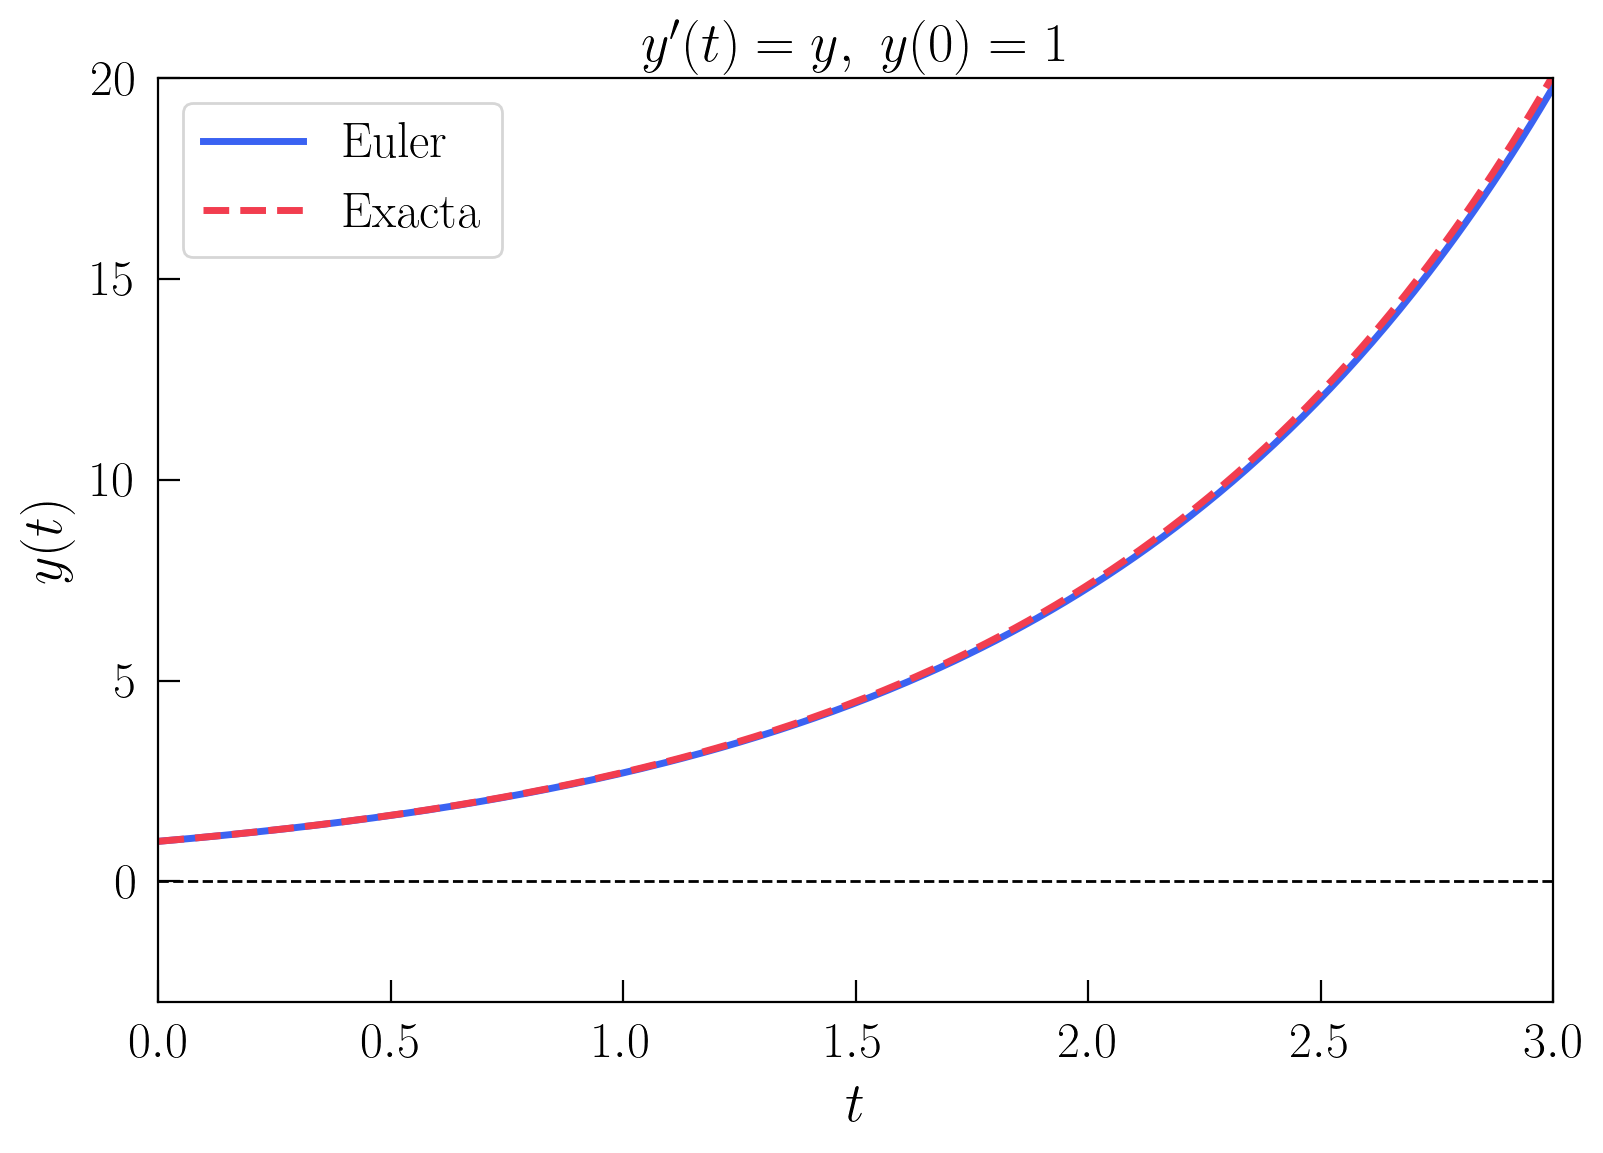

In [20]:
t_exact = np.arange(0, 3 + 0.01, 0.01) # 0 a 3 segundos con paso dt
y_exact = np.exp(t_exact) # solución exacta

t_num, y_num = simple_ode_euler(3, 0.01) # solución numérica (euler)

plt.figure()
ax = plt.axes(xlim=(0, 3), ylim=(-3, 20))
ax.plot([0, 3], [0, 0], color = "black", lw=1, ls="--")  
ax.plot(t_num, y_num, color = COLORS[0], label = "Euler") 
ax.plot(t_exact, y_exact, '--', color = COLORS[1], label = "Exacta") 
ax.set_xlabel("$t$")
ax.set_ylabel("$ y(t)$")
ax.set_title("$ y'(t) = y, \ y(0) = 1$")
ax.legend()
plt.show()

En la siguiente gráfica, se puede ver de manera interactiva cómo varía la aproximación numérica respecto de la exacta para diferentes valores de $\Delta t$. Para valores de $\Delta t$ próximos a $0.01$, la solución numérica es bastante buena en el intervalo representado. Sin embargo, para valores más grandes, la solución numérica se aleja cada vez más de la solución exacta, por lo que se ha comentado anteriormente del error cometido. ¿Cuánto se desvía la solución numérica de la exacta para un $\Delta t$ de $0.1$? ¿Y para 0.5?

In [11]:
def plot_euler(dt=0.01):
    t_exact = np.arange(0, 3 + 0.01, 0.01) # 0 a 3 segundos con paso dt
    y_exact = np.exp(t_exact) # solución exacta
    
    t_num, y_num = simple_ode_euler(3, dt) # solución numérica (euler)
    
    plt.figure()
    ax = plt.axes(xlim=(0, 3), ylim=(-3, 20))
    ax.plot([0, 3], [0, 0], color = "black", lw=1, ls="--")  
    ax.plot(t_num, y_num, color = COLORS[0], label = "Euler") 
    ax.plot(t_exact, y_exact, '--', color = COLORS[1], label = "Exacta") 
    ax.set_xlabel("$t$")
    ax.set_ylabel("$ y(t)$")
    ax.set_title("$ y'(t) = y, \ y(0) = 1$")
    ax.legend()
    plt.show()
    
interactive_plot = interactive(plot_euler, dt = (0.01, 1, 0.001))
display(interactive_plot)

interactive(children=(FloatSlider(value=0.01, description='dt', max=1.0, min=0.01, step=0.001), Output()), _do…

<a name='section_3'></a>

<h2 style="border:1px; border-style:solid; padding: 0.5em; color: #FFFFFF; background-color: #3a62f2">3. Formulación general del método de Euler explícito </h2>  

| [Top](#section_0) | [Previous Section](#section_2) | [Next Section](#section_4) |

En la sección anterior, vimos que el problema de del valor inicial 

$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = f(t, y(t)),$$

$$y(0) = y_0,$$

se podía resolver numéricamente con el **método de Euler explícito**, que se formulaba con la ecuación en diferencias 

$$y_{n+1} = y_n + \Delta tf(t_n, y_n).$$

En esta sección, vamos a programar este método de una manera más genérica, no solo para que valga para una única ecuación diferencial. Para evolucionar un sistema en el tiempo, necesitamos saber el instante inicial, $t_0$, el instante final $t_f$, la condición inicial $y_0$, la función $f(t, y)$ y el paso de tiempo $\Delta t$. En la siguiente celda, definimos una función que reciba estos parámetros y devuelva un array con los valores de $t$ y otro con los valores de $y$.

In [12]:
def euler(f, y0, t0, tf, dt):
    t = np.arange(t0, tf + dt, dt)
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0, len(t) - 1):
        y[n + 1] = y[n] + dt*f(t[n], y[n])
    return t, y

Con esta función, ya podemos resolver cualquier ecuación diferencial de primer orden solo con definir la función $f(t, y)$, que es quien nos va a distinguir si estamos simulando la evolución en el tiempo de un péndulo, un sistema de partículas, un circuito eléctrico, etc. Es decir, la física del problema que queremos resolver está toda contenida en esta función $f(t, y)$ y, utilizando la función `euler` de la celda anterior, únicamente deberemos definir otra función `f(t, y)` con el sistema que nos interese. Por ejemplo, para el caso del apartado anterior, definiríamos la función

In [13]:
def f(t, y):
    return y

(NOTA: la función $f(t, y)$ tiene el parámetro $t$ del tiempo porque, en general, puede depender de él, aunque en este caso no aparezca. Además, es conveniente definirla así porque las funciones de la librería `scipy` esperan la función en este formato.)

Y, utilizando ambas funciones, representamos la solución numérica 

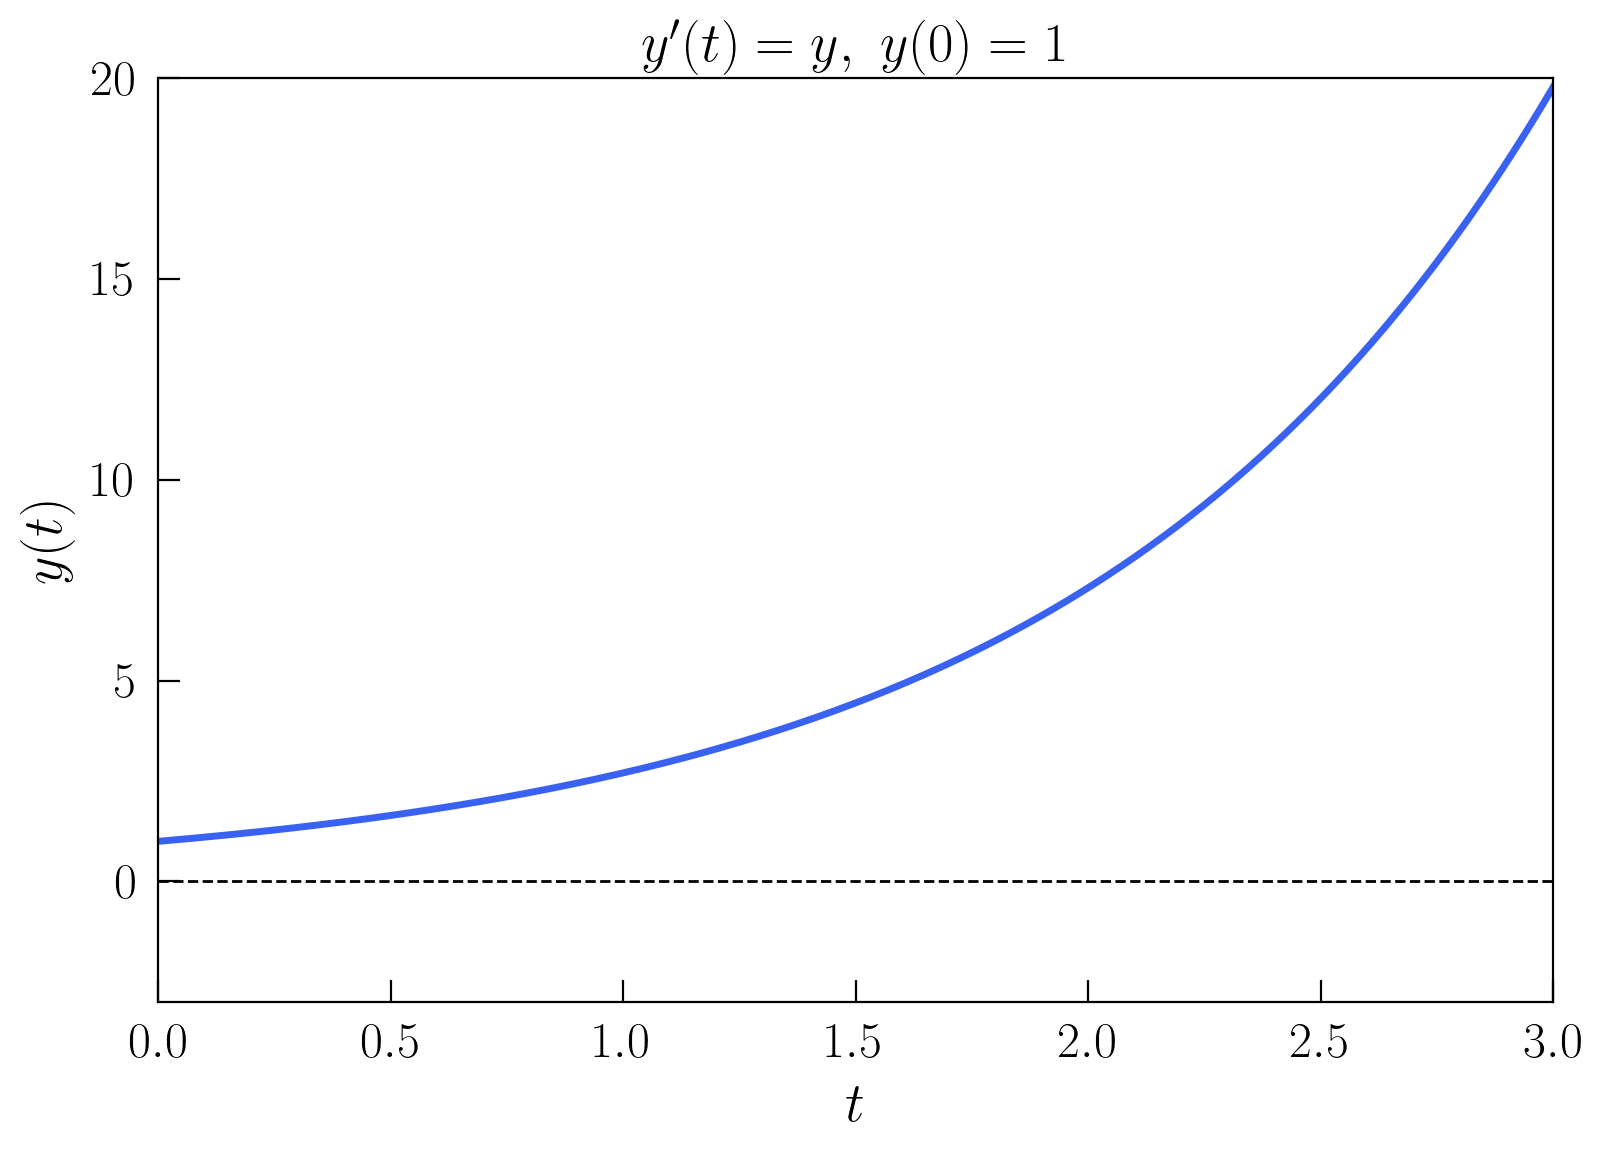

In [14]:
t_num, y_num = euler(f, 1, 0, 3, 0.01) # solución numérica (euler)

plt.figure()
ax = plt.axes(xlim=(0, 3), ylim=(-3, 20))
ax.plot([0, 3], [0, 0], color = "black", lw=1, ls="--")  
ax.plot(t_num, y_num, color = COLORS[0]) 
ax.set_xlabel("$t$")
ax.set_ylabel("$ y(t)$")
ax.set_title("$ y'(t) = y, \ y(0) = 1$")
plt.show()

A continuación, vamos a suponer que tenemos un sistema de $N$ ecuaciones diferenciales de primer orden, y no solo una única ecuación escalar. En este caso, el sistema se puede escribir como 

$$\frac{\mathrm{d}\vec{y}}{\mathrm{d}t}(t) = \vec{f}(t, \vec{y}),$$

$$\vec{y}(t_0) = \vec{y}_0,$$

donde $\vec{y}$ es un vector de $N$ componentes, $\vec{f}$ es una función vectorial de $N$ componentes y $\vec{y}_0$ es un vector de $N$ componentes con las condiciones iniciales. A pesar de la aparente complejidad adicional, sin embargo, el método de Euler se sigue aplicando exactamente igual, componente a componente, como

$$\vec{y}_{n+1} = \vec{y}_n + \Delta t\vec{f}(t_n, \vec{y}_n).$$

Desarrollando la anterior expresión por componentes, para entender mejor el sistema, tenemos

$$\begin{pmatrix}y_{n+1}^1 \\ y_{n+1}^2 \\ \vdots \\ y_{n+1}^N\end{pmatrix} = \begin{pmatrix}y_{n}^1 \\ y_{n}^2 \\ \vdots \\ y_{n}^N\end{pmatrix} + \Delta t \begin{pmatrix}f_{n}^1 \\ f_{n}^2 \\ \vdots \\ f_{n}^N\end{pmatrix},$$

donde, por ejemplo, $y_{n+1}^2$ denota la segunda componente del vector de $\vec{y}$ en la iteración $n+1$. A la hora de programarlo, hay que hacer una ligera modificación a nuestro código anterior, para admitir que nuestra $y$ sea un vector, y quedaría como

In [15]:
def euler(f, y0, t0, tf, dt):
    t = np.arange(t0, tf + dt, dt)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for n in range(0, len(t) - 1):
        y[n + 1] = y[n] + dt*f(t[n], y[n])
    return t, y

Como se puede observer, el código es bastante legible porque es una traducción directa de la expresión matemática.

Ahora, veamos un ejemplo donde resolvemos un sistema de ecuaciones utilizando esta función de `euler` definida en la celda anterior. Las ecuaciones de Lotka-Volterra son un par de ecuaciones diferenciales que se usan para modelizar de manera simple la evolución de la población de dos especies en un ecosistema. Este sistema viene dado por 

$$\frac{\mathrm{d}x}{\mathrm{d}t}(t) = \alpha x - \beta x y,$$

$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = \gamma x y - \delta y,$$

donde $x$ y $y$ son las poblaciones de las dos especies ($x$ la presa e $y$ el depredador), $\alpha$, $\beta$, $\gamma$ y $\delta$ son parámetros que dependen de las características de las especies y del ecosistema. En este caso, vamos a suponer que $\alpha = 0.5$, $\beta = 0.3$, $\gamma = 0.25$ y $\delta = 0.75$.

Como se indicó anteriormente, la física del problema viene en el término a la derecha de la igualdad. Por lo tanto, en este caso, la función $\vec{f}(t, \vec{y})$ que hay que programar es

$$\vec{f}(t, \vec{y}) = \begin{pmatrix}0.5 y_1 - 0.1 y_1 y_2 \\ 2.0 y_1 y_2 - 0.75 y_2\end{pmatrix},$$

donde denotamos $x = y_1$ y $y = y_2$. En la siguiente celda, definimos la función $\vec{f}(t, \vec{y})$, a la que llamamos `lotka_volterra` para que tenga un nombre descriptivo del sistema que queremos modelizar

In [16]:
def lotka_volterra(t, y):
    return np.array([0.5 * y[0] - 0.3 * y[0] * y[1], 0.25 * y[0] * y[1] - 0.75 * y[1]])

Y, a continuación, simulamos la evolución de ambas poblaciones con la función `euler`, donde ahora pasamos la función `lotka_volterra` como parámetro `f`, en un intervalo de tiempo $[0, 40]$.

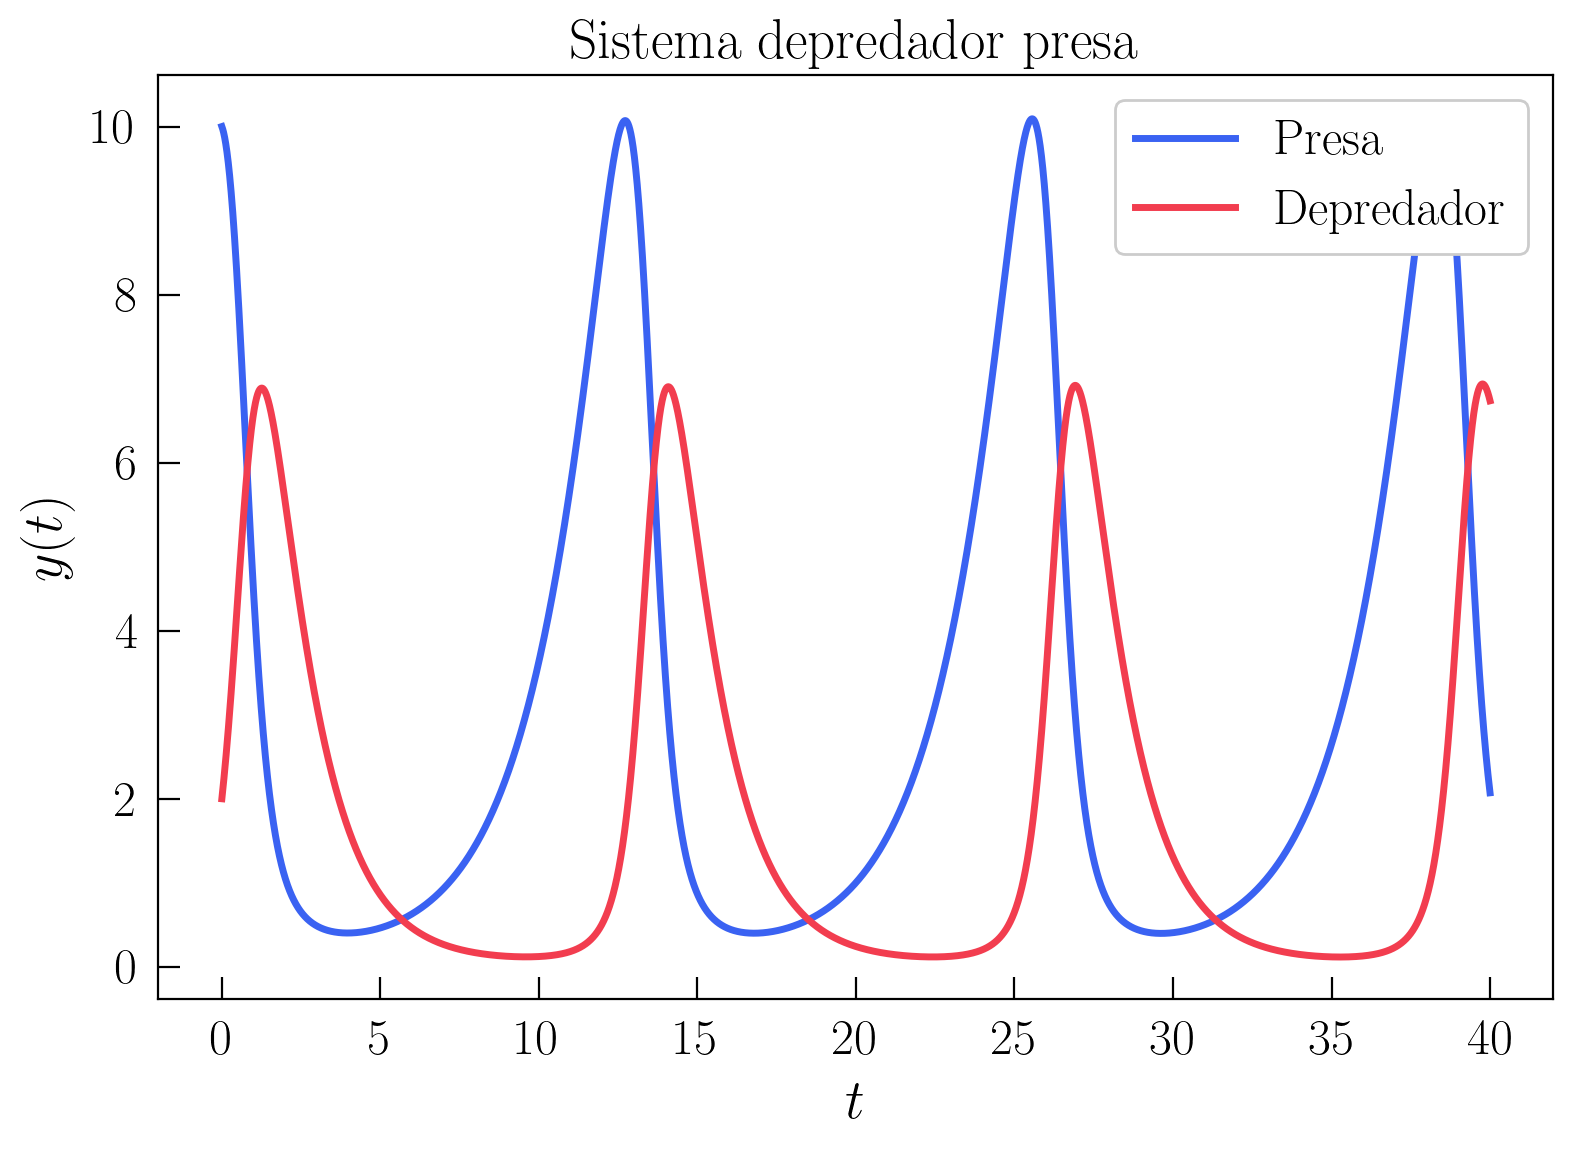

In [17]:
y0 = np.array([10, 2])
t_num, y_num = euler(lotka_volterra, y0, 0, 40, 0.001) # solución numérica 

plt.figure()
ax = plt.axes()
ax.plot(t_num, y_num[:, 0], color = COLORS[0], label="Presa")
ax.plot(t_num, y_num[:, 1], color = COLORS[1], label="Depredador") 
ax.set_xlabel("$t$")
ax.set_ylabel("$ y(t)$")
ax.set_title("Sistema depredador presa")
ax.legend(loc="upper right", framealpha=1)
plt.show()

Inicialmente, hemos fijado como condición inicial $\vec{y}_0 = (10, 2)$. En este modelo de dinámica de poblaciones, esto significa que inicialmente tenemos 10 presas y 2 depredadores (las presas podrían ser conejos y los depredadores zorros de un determinado ecosistema). Cuando simulamos el sistema integrando numéricamente las ODEs con Euler, observamos que, inicialmente, se produce un rápido crecimiento en el número de depredadores y una bajada en el número de presas. Esto es porque, al comienzo, hay muchas más presas que depredadores y, por tanto, los depredadores se pueden alimentar y reproducirse, mientras que las presas van muriendo y desciende su número.

Sin embargo, cuando hay muchos depredadores y pocas presas, los depredadores empiezan a morir por falta de alimento. Posteriormente, debido a la falta de depredadores, vuelve a crecer el número de presas y se produce un ciclo de crecimiento y decrecimiento de ambas poblaciones.

Evidentemente, esto es una idealización de la realidad, porque dejamos que el número de depredadores y presas tome valores en todos los números reales. Una mejor aproximación sería que solo pudieran tomar valores enteros, pero esto no se va a explorar en esta sección.

<a name='section_4'></a>

<h2 style="border:1px; border-style:solid; padding: 0.5em; color: #FFFFFF; background-color: #3a62f2">4. Ecuaciones diferenciales con scipy </h2>  

| [Top](#section_0) | [Previous Section](#section_3) | [Next Section](#section_5) |

La simulación de ecuaciones diferenciales es una tarea muy común en el ámbito científico. Por ello, aunque es posible generar pequeñas funciones propias para realizar estas simulaciones, Python ya implementa a través de la librería `scipy` muchas de estas funcionalidades.

Cabe destacar que, a diferencia de las operaciones con matrices que implementa `numpy`, que son muchísimo más eficientes que las que podemos obtener programando los bucles `for` a mano en Python, para el caso de ecuaciones diferenciales las implementaciones de `scipy` no tienen gran ganancia en eficiencia. Esto es debido a que, para avanzar en el tiempo en una ecuación diferencial, necesitamos conocer la información del paso anterior. Por lo tanto, es un problema secuencial que no permite paralelización y muchos de los algoritmos están programados nativamente en Python (que es un lenguaje lento).

La [función](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) que vamos a usar para integrar ecuaciones diferenciales en `scipy` es `scipy.integrate.solve_ivp` (solve_ivp viene de solve initial value problem). Como ya se explicó en el apartado anterior, lo único que vamos a tener que programar es la función $\vec{f}(t, \vec{y})$, y el resto será elegir unas condiciones iniciales, el intervalo de tiempo que queremos simular y con qué integrador temporal (ya que hay muchos disponibles a parte del método de Euler).

Para replicar el primer ejemplo que hemos hecho en este cuaderno, volvemos a definir la función

In [18]:
def f(t, y):
    return y

donde es muy importante que el primer argumento de la función sea el tiempo y el segundo $y$, ya que es la forma en la que `solve_ivp` espera recibir los argumentos. A continuación, resolvemos la ecuación diferencial $y'=y$ con `solve_ivp` y almacenamos la solución en la variable `sol`

In [19]:
tspan = [0, 3] # Lista con el tiempo inicial y final
y0 = [1] # Condición inicial (que debe estar en forma de lista o numpy array)

sol = sp.integrate.solve_ivp(f, tspan, y0) # solución por scipy

Para acceder al vector de tiempos desde la variable de `sol` haremos `sol.t` y para acceder a los valores de $y$ `sol.y`

In [20]:
sol.t

array([0.        , 0.10001999, 1.06609106, 2.30431769, 3.        ])

In [21]:
sol.y

array([[ 1.        ,  1.10519301,  2.9040598 , 10.01740317, 20.08580546]])

Como podemos ver, solo ha almacenado la solución en 5 instantes temporales. Esto es porque, por defecto, `solve_ivp` utiliza un integrador llamado `RungeKutta45`, que es adaptativo y de mayor orden que el método de Euler. (El resto de integradores que tiene scipy se puede ver [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)) Como tener tan pocos puntos es problemático para visualizar la solución, podemos indicar el parámetro `dense_output=True` para obtener una solución "continua" en la que podemos evaluar la solución para cualquier valor de tiempo que indiquemos.

In [22]:
sol = sp.integrate.solve_ivp(f, tspan, y0, dense_output=True) # solución scipy

Esta `sol` la podemos evaluar ahora en cualquier instante de tiempo que queramos, por ejemplo,

In [23]:
t = np.linspace(0, 3, 100)

In [24]:
sol.sol(t) # solución en el intervalo t

array([[ 1.        ,  1.03076684,  1.06248028,  1.09516944,  1.12886641,
         1.1636065 ,  1.19941898,  1.23633419,  1.27438395,  1.31360161,
         1.35402203,  1.39568156,  1.43861805,  1.48287086,  1.52848088,
         1.57549046,  1.62394349,  1.67388536,  1.72536295,  1.77842465,
         1.83312037,  1.8895015 ,  1.94762096,  2.00753317,  2.06929403,
         2.13296097,  2.19859293,  2.26625033,  2.33599512,  2.40789074,
         2.48200214,  2.55839577,  2.63713959,  2.71830307,  2.80195717,
         2.88817437,  2.97704956,  3.06869367,  3.1631777 ,  3.26057607,
         3.36096771,  3.46443604,  3.57106899,  3.68095897,  3.79420292,
         3.91090226,  4.0311629 ,  4.15509528,  4.28281433,  4.41443945,
         4.55009458,  4.68990815,  4.83401306,  4.98254676,  5.13565116,
         5.29347269,  5.45616227,  5.62387532,  5.79677178,  5.97501605,
         6.15877708,  6.34822827,  6.54354756,  6.74491737,  6.95252463,
         7.16656075,  7.38722166,  7.61470778,  7.8

Representándolo gráficamente, obtenemos

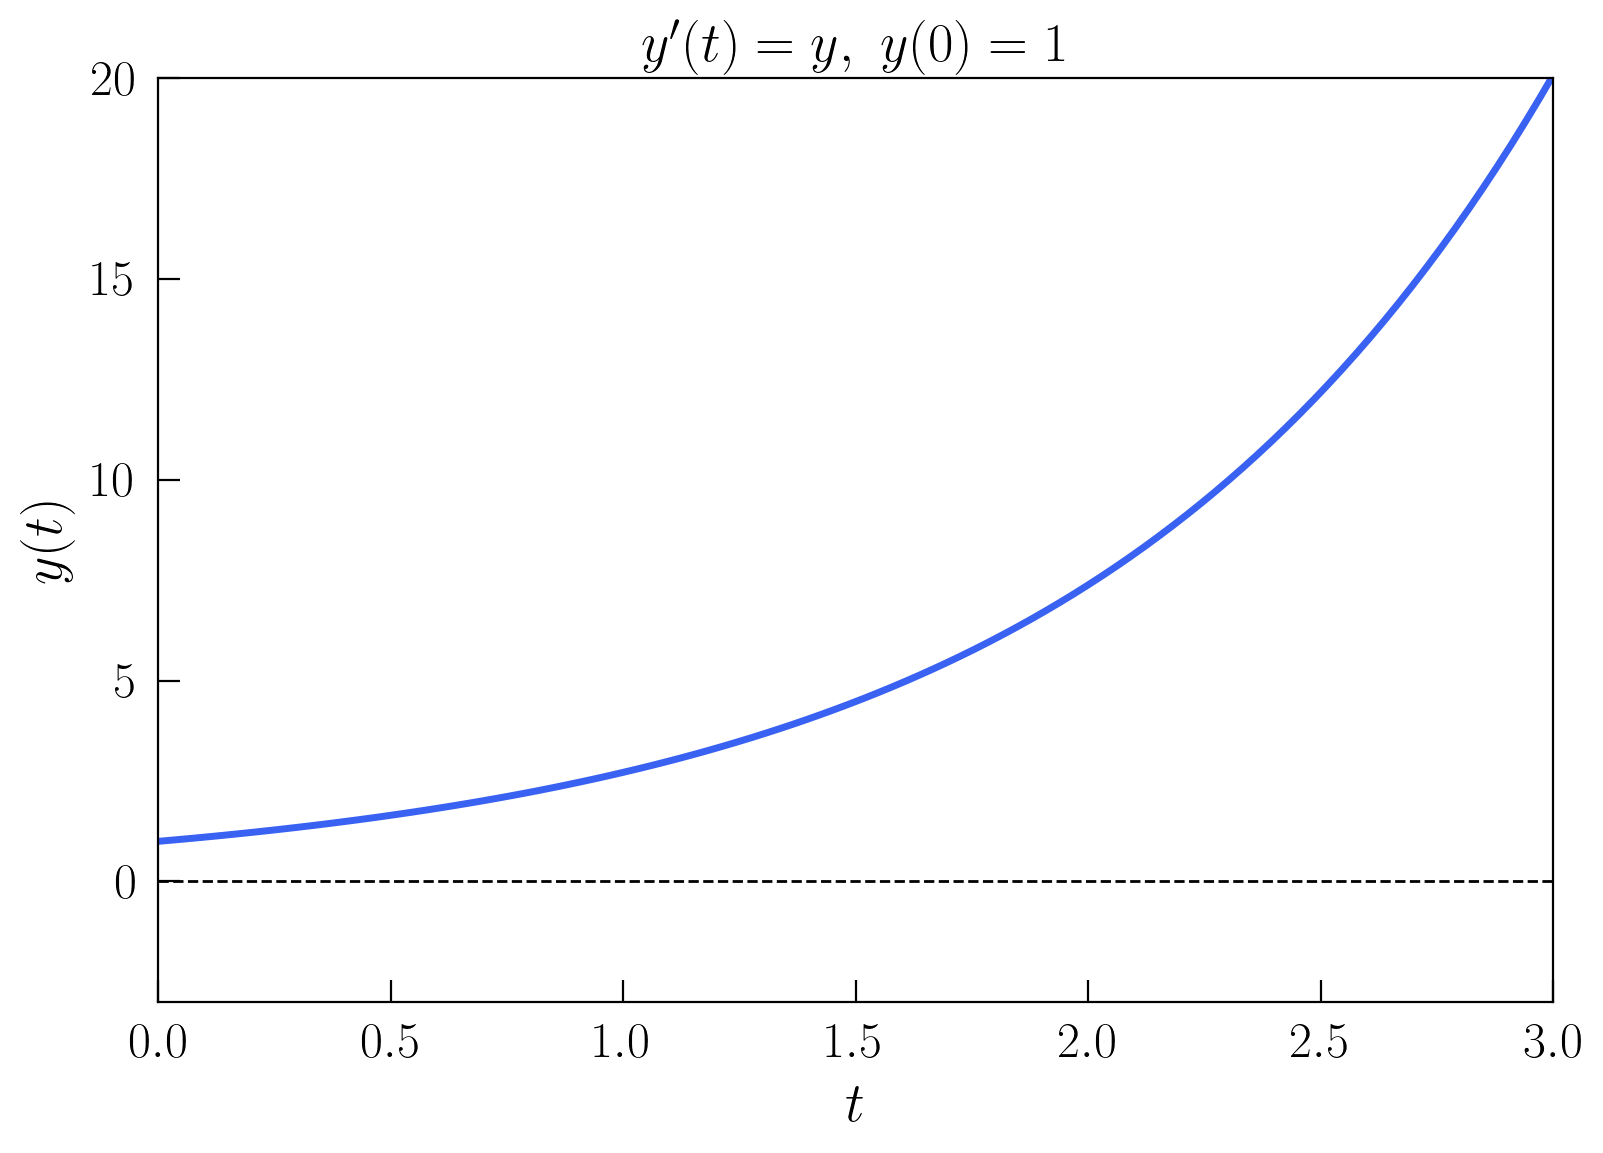

In [25]:
plt.figure()
ax = plt.axes(xlim=(0, 3), ylim=(-3, 20))
ax.plot([0, 3], [0, 0], color = "black", lw=1, ls="--")  
ax.plot(t, sol.sol(t)[0], color = COLORS[0]) # Necesario indicar sol.sol(t)[0] 
ax.set_xlabel("$t$")
ax.set_ylabel("$ y(t)$")
ax.set_title("$ y'(t) = y, \ y(0) = 1$")
plt.show()

Comprobemos también que funciona con el modelo Lotka-Volterra

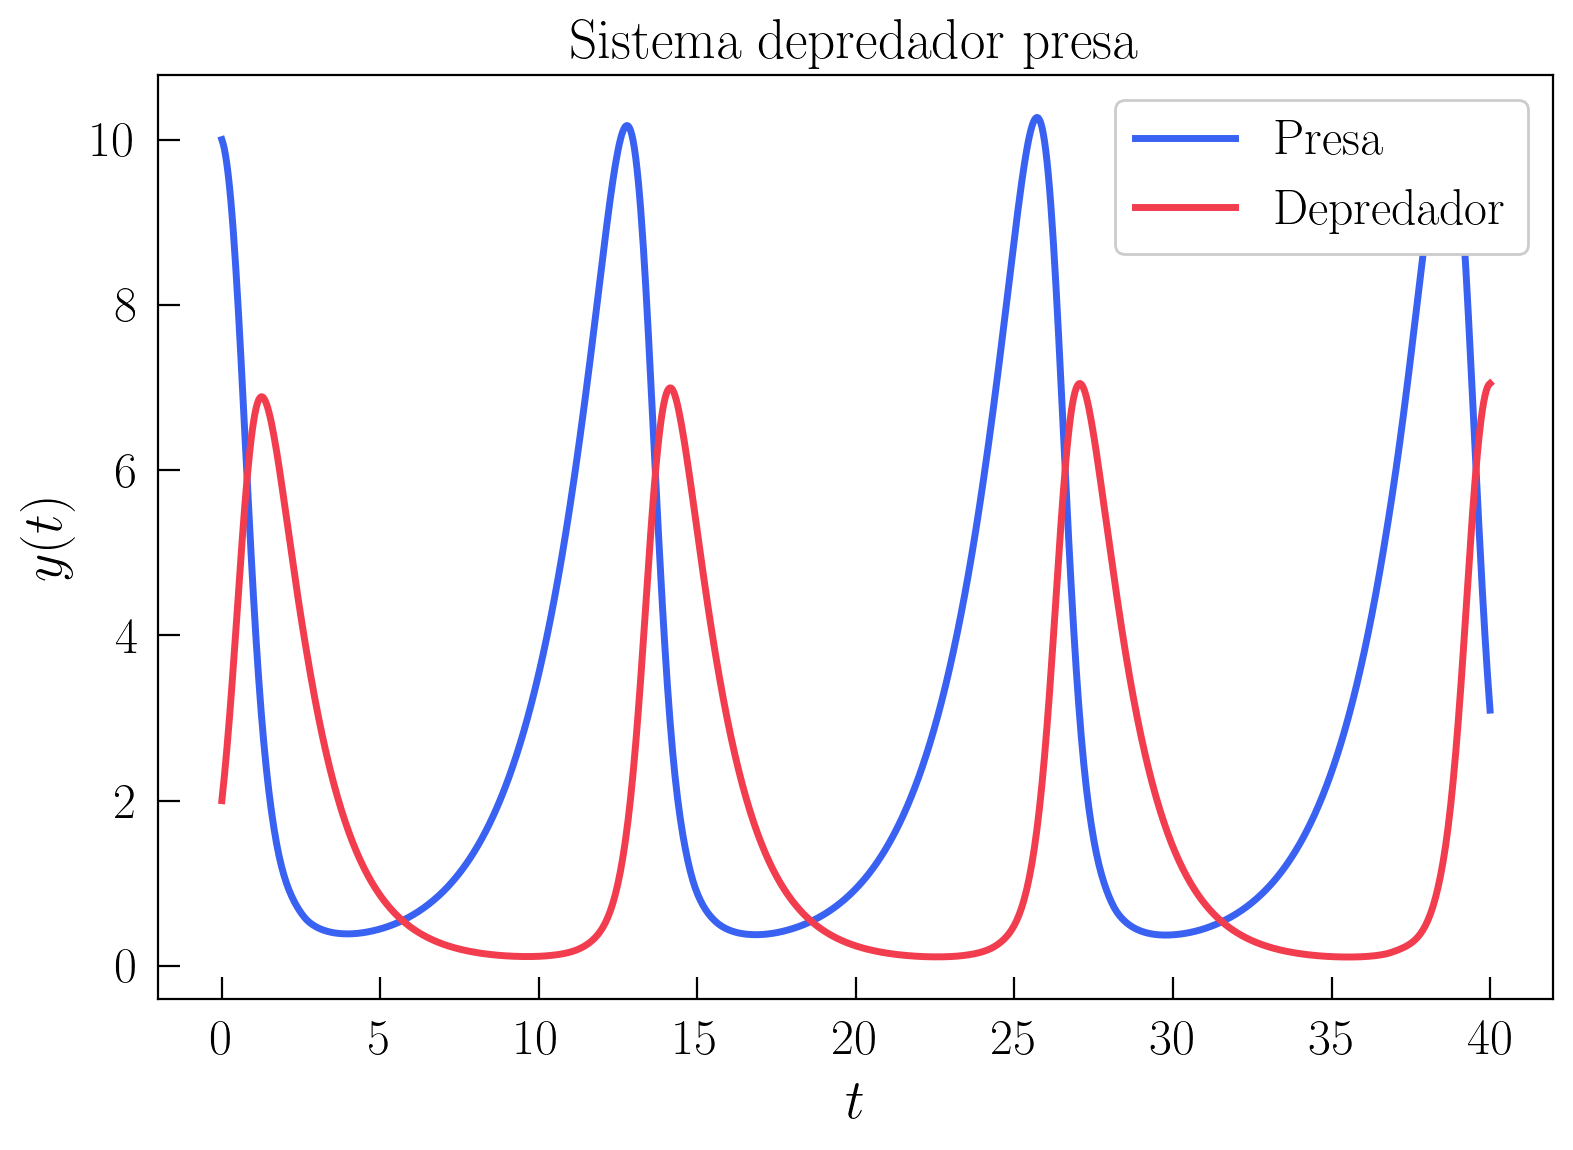

In [26]:
tspan = [0, 40] # Lista con el tiempo inicial y final
y0 = [10, 2] # Condición inicial (que debe estar en forma de lista o np.array)

sol = sp.integrate.solve_ivp(lotka_volterra, tspan, y0, dense_output=True) 

t = np.linspace(tspan[0], tspan[1], 1000)

plt.figure()
ax = plt.axes()
ax.plot(t, sol.sol(t)[0], color = COLORS[0], label="Presa")
ax.plot(t, sol.sol(t)[1], color = COLORS[1], label="Depredador") 
ax.set_xlabel("$t$")
ax.set_ylabel("$ y(t)$")
ax.set_title("Sistema depredador presa")
ax.legend(loc="upper right", framealpha=1)
plt.show()

Mirando la documentación, prueba a cambiar el integrador de `RK45` (el que se usa por defecto) a `LSODA` y observa si cambia la solución.

<a name='section_5'></a>

<h2 style="border:1px; border-style:solid; padding: 0.5em; color: #FFFFFF; background-color: #3a62f2">5. Oscilador Armónico </h2>  

| [Top](#section_0) | [Previous Section](#section_4) | [Next Section](#section_6) |


Utilizando las herramientas que hemos aprendido, en las dos secciones restantes vamos a resolver dos problemas físicos de interés. Las ecuaciones diferenciales son de tanto interés ya que, la Segunda Ley de Newton, es una ecuación diferencial puesto que la aceleración $a$ es la segunda derivada de la posición $x$ con respecto al tiempo $t$, $\ddot{x}$, por lo que la evolución dinámica de un sistema viene descrita por ecuaciones diferenciales.

Imaginemos una masa $m$ que se encuentra sujeta a una pared por un muelle de constante elástica $k$, en ausencia de cualquier otra fuerza. Por la ley de Hooke, la fuerza del muelle es $F=-kx$ y, aplicando la segunda ley de Newton, queda

$$m\ddot{x} = -kx.$$

<img src="https://github.com/RayleighLord/Resources/blob/main/img/mass-spring.png?raw=true"  width="50%">

Para simplificar, el estudio, supongamos que $m=1$ y $k=1$, de forma que la ecuación diferencial queda

$$\ddot{x} = -x.$$

Pensemos por un momento en cuál sería la solución analítica de esta ecuación diferencial. Necesitamos una función que, derivada dos veces, nos devuelva la misma función con un signo menos delante. Entonces, se nos puede ocurrir que la solución sea del tipo $\cos(t)$ o $\sin(t)$, ya que estas funciones satisfacen este requisito. Por lo tanto, cuando resolvamos numéricamente con `scipy` el sistema, esperamos obtener soluciones oscilatorias. No vamos a deternos más en la solución analítica más que para generar esta intuición de lo que debe salir una vez resuelto el problema.

Para resolver numéricamente la ecuación diferencial ahora hay una pequeña dificultad. Anteriormente, se discutió sobre cómo resolver sistemas de ecuaciones diferenciales **de primer orden**. Sin embargo, ahora tenemos una ecuación diferencial de **segundo orden** (ya que hay una derivada segunda) y no podemos aplicar lo visto anteriormente directamente.

Afortunadamente, es fácil transformar una ecuación diferencial de segundo orden en un sistema de dos ecuaciones diferenciales de primer orden a través de un cambio de variable (y esto es válido para cualquier orden). Para ello, simplemente introducimos las variables $y_1 = x$ y $y_2 = \dot{x}$, de forma que la ecuación diferencial de segundo orden se transforma en las dos ecuaciones de primer orden

$$\ddot{x} = -x \rightarrow \begin{pmatrix} \dot{x} \\ \ddot{x} \end{pmatrix} = \frac{\mathrm{d}}{\mathrm{d}t} \begin{pmatrix} x \\ \dot{x} \end{pmatrix} = \begin{pmatrix} \dot{x} \\ -x \end{pmatrix},$$

que, con las nuevas variables, finalmente queda

$$\frac{\mathrm{d}}{\mathrm{d}t} \begin{pmatrix} y_1 \\ y_2 \end{pmatrix} = \begin{pmatrix} y_2 \\ -y_1 \end{pmatrix}.$$

Escrito en forma de sistema de la forma vista anteriormente con $\vec{f}(t, \vec{y})$ se obtiene

$$\frac{\mathrm{d}\vec{y}}{\mathrm{d}t} = \vec{f}(t, \vec{y}) = \begin{pmatrix} y_2 \\ -y_1 \end{pmatrix}.$$

Por lo tanto, solo queda definir la función $\vec{f}(t, \vec{y})$ de este problema, que como ya hemos dicho es la que contiene la física del problema, y simularlo con `solve_ivp`. Para ello, definimos la función

In [27]:
def harmonic_oscillator(t, y):
    return np.array([y[1], -y[0]])

Por el cambio de variable realizado, la coordenada $y_1 = x$ es la posición de la masa y la coordenada $y_2 = \dot{x}$ es la velocidad de la masa. Por lo tanto, si queremos aplicar una condición inicial de mover la masa ligeramente desde la posición de equilibrio y soltarla desde el reposo, tendremos que definir la condición inicial como

$$\vec{y}(0) = \begin{pmatrix} 1 \\ 0 \end{pmatrix},$$

donde $1$ es la posición inicial y $0$ es la velocidad inicial. Por lo tanto, ya podemos resolver la ecuación diferencial, obteniendo

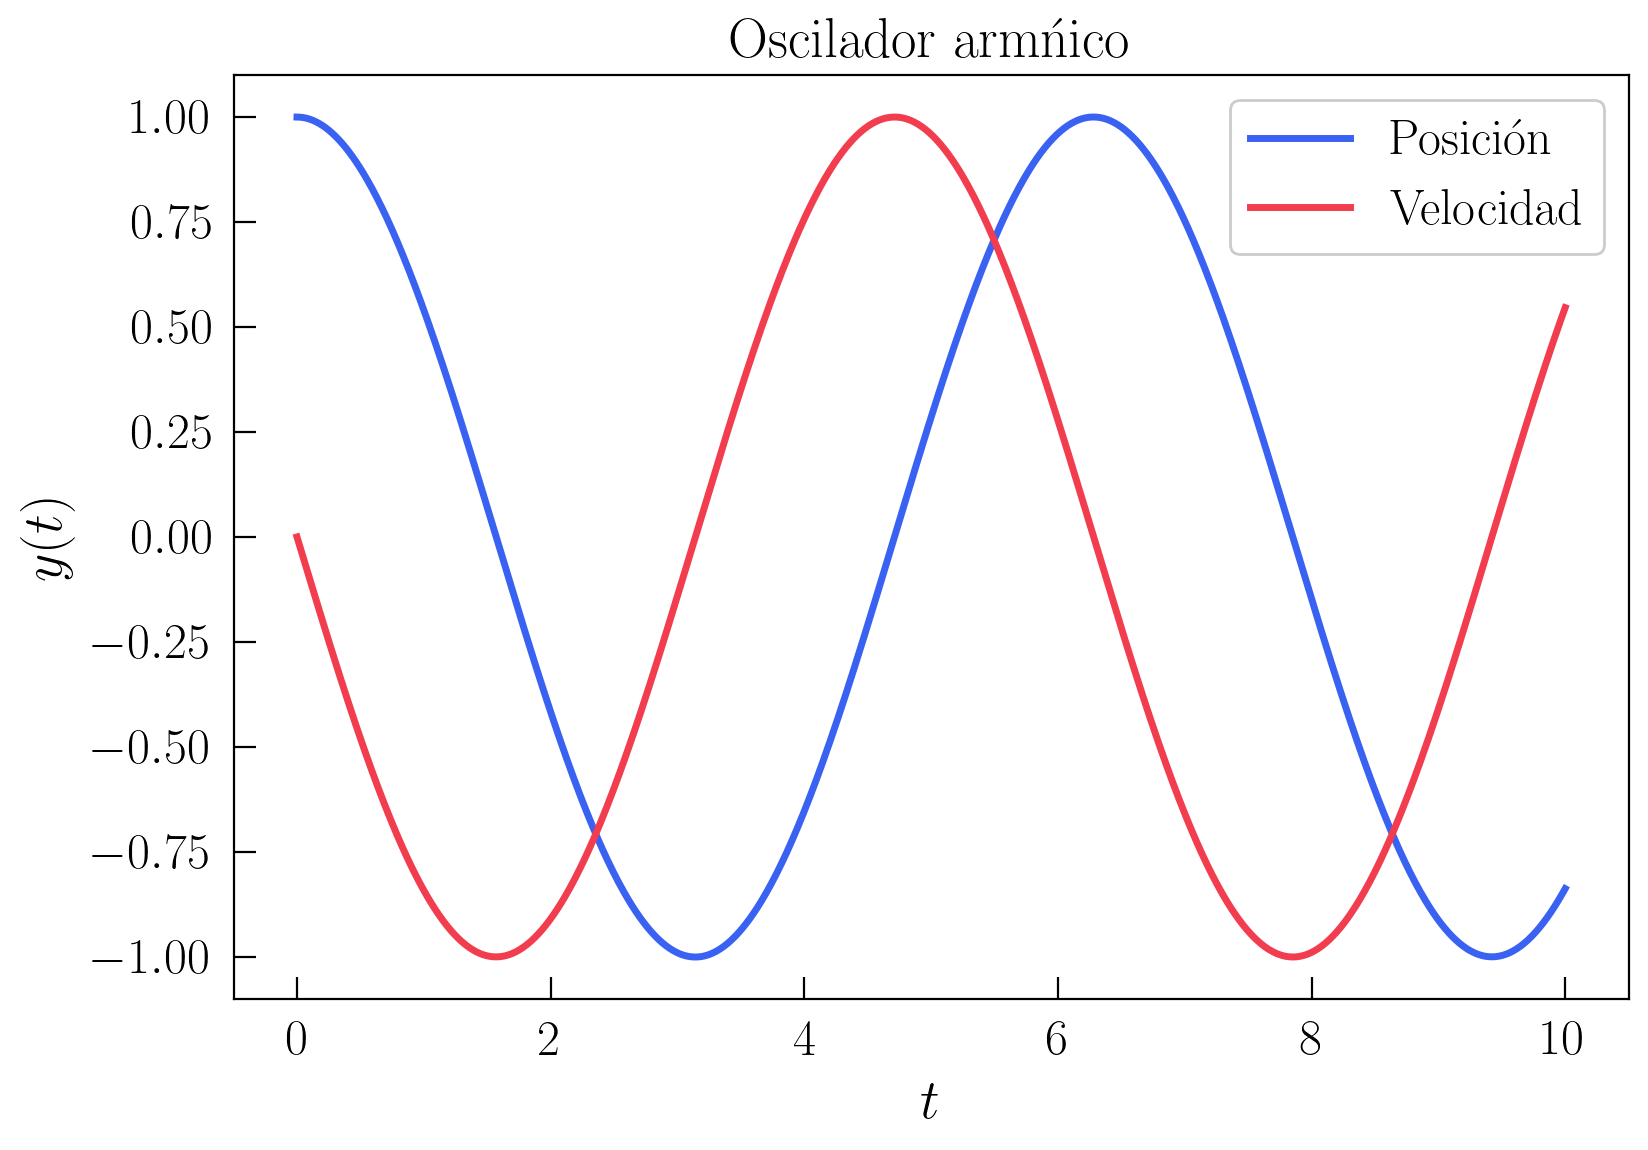

In [28]:
tspan = [0, 10] # Lista con el tiempo inicial y final
y0 = [1, 0] # Condición inicial (que debe estar en forma de lista o np.array)

sol = sp.integrate.solve_ivp(harmonic_oscillator, tspan, y0, dense_output=True) 

t = np.linspace(tspan[0], tspan[1], 1000)

plt.figure()
ax = plt.axes()
ax.plot(t, sol.sol(t)[0], color = COLORS[0], label="Posición")
ax.plot(t, sol.sol(t)[1], color = COLORS[1], label="Velocidad") 
ax.set_xlabel("$t$")
ax.set_ylabel("$ y(t)$")
ax.set_title("Oscilador armńico")
ax.legend(loc="upper right", framealpha=1)
plt.show()

Esta solución es coherente con el análisis que hicimos al comienzo, porque se obtienen soluciones oscilatorias (la solución analítica en este caso es $x = \cos(t)$ y, por tanto, la velocidad también es oscilatoria $\dot{x} = -\sin(t)$).

<a name='section_6'></a>

<h2 style="border:1px; border-style:solid; padding: 0.5em; color: #FFFFFF; background-color: #3a62f2">6. Paracaidista en caída libre: velocidad límite </h2>  

| [Top](#section_0) | [Previous Section](#section_5) |


Imaginemos un paracaidista en caída libre. El paracaidista cae hacia abajo por la fuerza de la gravedad, $mg$, y, si no hubiera otra fuerza, aceleraría continuamente en todo el proceso de caída. Sin embargo, debido al aire, el paracaidista encontrará una fuerza de resistencia que se opone a él. En este problema vamos a suponer que la resistencia aerodinámica es proporcional a su velocidad, $bv$, donde $b$ es una constante. En este caso, la Segunda Ley de Newton queda como

$$m\dot{v} = mg - bv,$$

$$ \Rightarrow \dot{v} = g - \frac{b}{m}v,$$

donde vamos a resolver para la velocidad $v$ del paracaidista en la caída libre.

<img src="https://github.com/RayleighLord/Resources/blob/main/img/ball_dropping.png?raw=true"  width="30%">

Antes de simular este caso, vamos a analizar físicamente qué es lo que puede ocurrir. Debido a que la resistencia del aire es proporcional a la velocidad del paracaidista, cuando mayor sea su velocidad más se opondrá el aire a su avance. Sin embargo, la otra fuerza, que es la del peso, es constante a lo largo de toda la caída. 

Por lo tanto, para una velocidad suficientemente alta, el paracaidista sufrirá una fuerza de resistencia del aire mayor que la del peso, por lo que se empezará a frenar. En caso contrario, partiendo desde una velocidad pequeña, el paracaidista acelerará porque la fuerza del peso será mayor. Entonces, nos podemos hacer la pregunta: ¿hay alguna velocidad para la que se deje de acelerar? Si imponemos que la aceleración sea cero, $\dot{v} = 0$, y despejamos $v$, obtenemos

$$v_{\text{lim}} = \frac{mg}{b},$$

donde $v_{\text{lim}}$ denota la velocidad límite. En este sistema, entonces, esperamos un comportamiento diferente dependiendo de las condiciones iniciales. Si la velocidad inicial es mayor que $v_{\text{lim}}$, veremos un movimiento de frenada, mientras que si la velocidad inicial es menor que $v_{\text{lim}}$, veremos un movimiento de aceleración hasta llegar a la velocidad límite.

Pasando a la resolución de la ecuación diferencial, vamos a fijar los valores de los parámetros $m = 80$, $g = 10$ y $b = 8$, por lo que la velocidad límite de caída libre es $v_{\text{lim}} = 100 \text{ m/s}$. Resolviendo la ecuación diferencial con `scipy`, para diferentes condiciones iniciales, obtenemos

In [29]:
m = 80; g = 10; b = 8;

def free_fall(t, v):
    return g - b / m * v

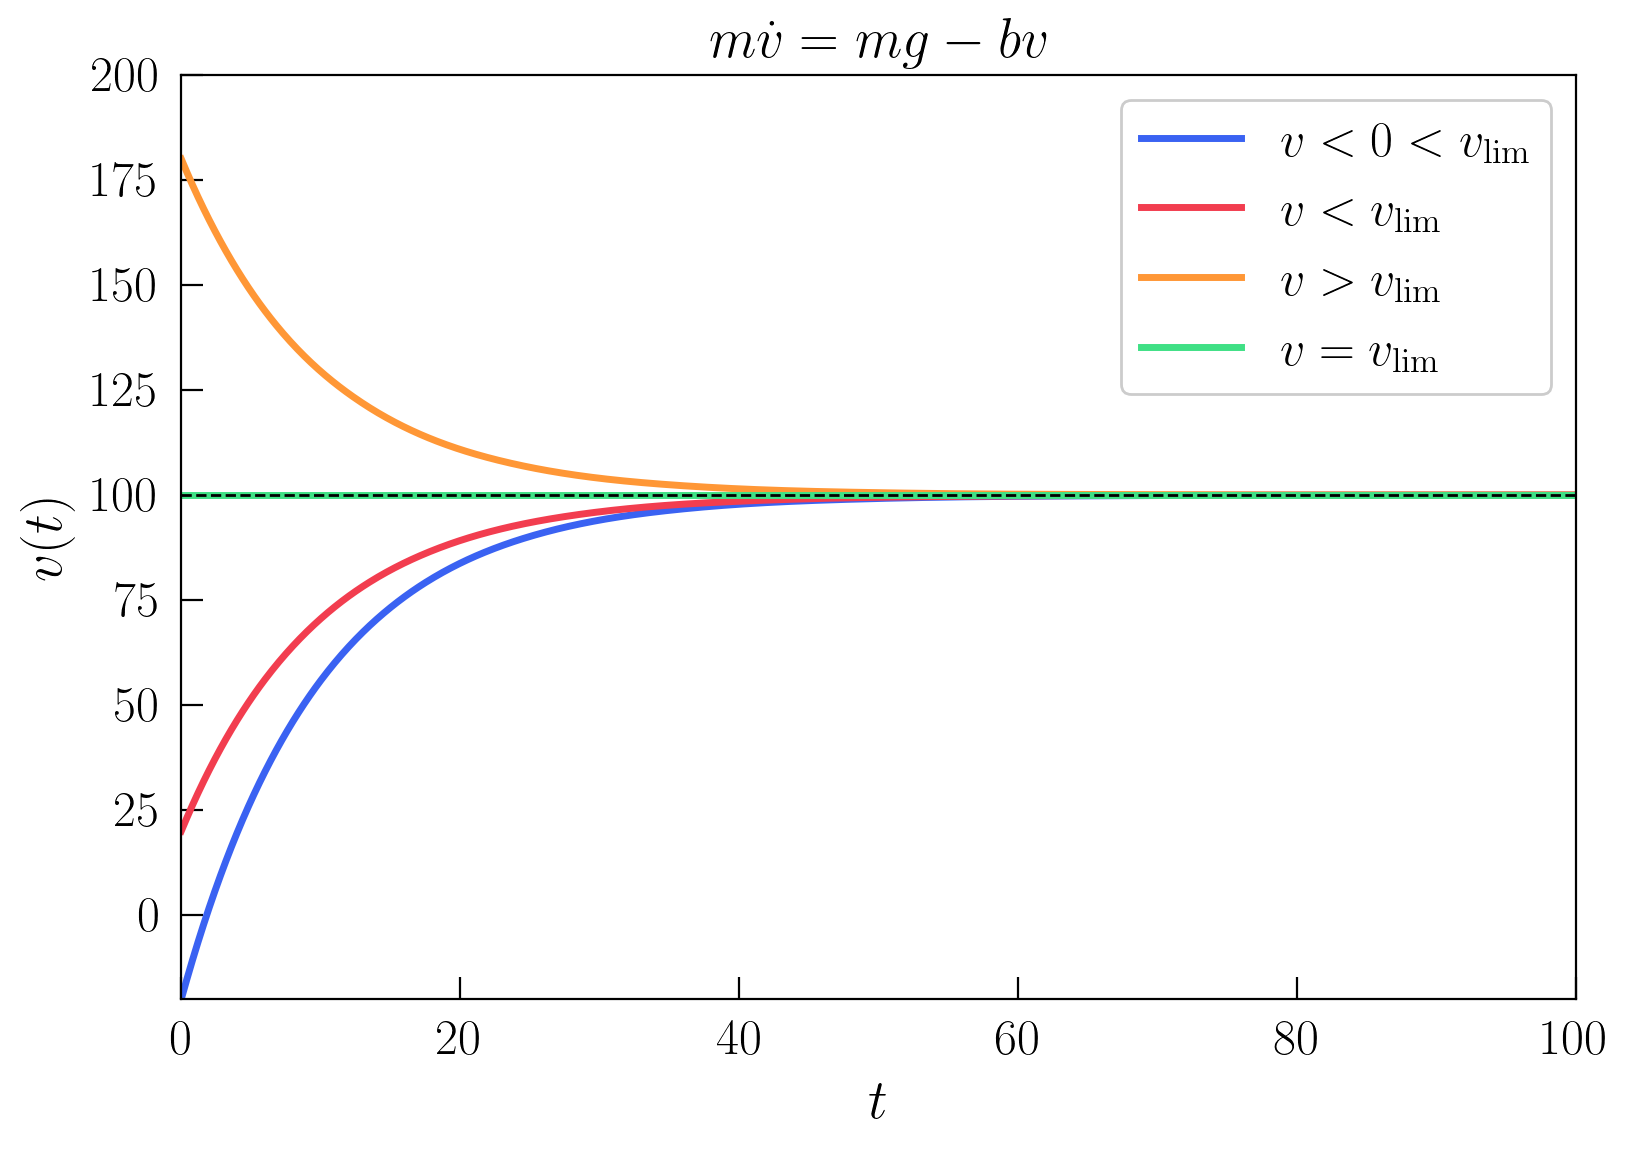

In [30]:
vlim = m * g / b

tspan = [0, 100] # Lista con el tiempo inicial y final
v0_1 = [-20] # Velocidad inicial hacia arriba
v0_2 = [20]  # Velocidad inicial v < vlim
v0_3 = [180] # Velocidad inicial v > vlim
v0_4 = [vlim] # Velocidad inicial v = vlim

sol_1 = sp.integrate.solve_ivp(free_fall, tspan, v0_1, dense_output=True) 
sol_2 = sp.integrate.solve_ivp(free_fall, tspan, v0_2, dense_output=True) 
sol_3 = sp.integrate.solve_ivp(free_fall, tspan, v0_3, dense_output=True) 
sol_4 = sp.integrate.solve_ivp(free_fall, tspan, v0_4, dense_output=True) 

t = np.linspace(tspan[0], tspan[1], 1000)

plt.figure()
ax = plt.axes(xlim=(0, 100), ylim=(-20, 200))
ax.plot(t, sol_1.sol(t)[0], color = COLORS[0],
            label="$v < 0 < v_{\\mathrm{lim}}$")
ax.plot(t, sol_2.sol(t)[0], color = COLORS[1], label="$v < v_{\\mathrm{lim}}$")
ax.plot(t, sol_3.sol(t)[0], color = COLORS[2], label="$v > v_{\\mathrm{lim}}$")
ax.plot(t, sol_4.sol(t)[0], color = COLORS[3], label="$v = v_{\\mathrm{lim}}$")
ax.plot([t[0], t[-1]], [vlim, vlim], color = "black", lw=1, ls="--")
ax.set_xlabel("$t$")
ax.set_ylabel("$ v(t)$")
ax.set_title("$m\dot{v} = mg - bv$")
ax.legend(loc="upper right", framealpha=1)
plt.show()

Como se puede ver, dependiendo de la condición inicial se puede obtener un movimiento donde la velocidad se incrementa hasta tender asintóticamente a $v_{\text{lim}}$, un movimiento donde la velocidad se reduce hasta tender asintóticamente también a la velocidad límite, o si se parte de la velocidad límite se permanece en ella en todo instante. 

La dependencia de la solución con la condición inicial es algo típico que ocurre en ecuaciones diferenciales. En otros casos, veremos que, dependiendo de la condición inicial, podemos llegar a soluciones finales cuando el tiempo es suficientemente grande completamente diferentes.

Para concluir esta sección, se va a incluir una visualización interactiva de cómo varía la solución de este problema cambiando los parámetros $m$, $b$ y la condición inicial $v_0$. Ejecuta la siguiente celda y prueba a cambiar los parámetros. ¿Qué ocurre cuando $b$ es muy grande? ¿Y cuando $b$ es muy pequeño? ¿Qué ocurre cuando $m$ es muy grande? ¿Y cuando $m$ es muy pequeño?

In [31]:
def plot_freefall(v0=0, b=8, m=80):
    
    def free_fall(t, v):
        return g - b / m * v

    vlim = m * g / b
    
    tspan = [0, 100] # Lista con el tiempo inicial y final
    sol = sp.integrate.solve_ivp(free_fall, tspan, [v0], dense_output=True) 

    t = np.linspace(tspan[0], tspan[1], 1000)
    
    plt.figure()
    ax = plt.axes(xlim=(0, 100), ylim=(-20, 200))
    ax.plot(t, sol.sol(t)[0], color = COLORS[0])
    ax.plot([t[0], t[-1]], [vlim, vlim], color = "black", lw=1, ls="--")
    ax.plot(t[0], sol.sol(0)[0], 'o', color = COLORS[0], clip_on=False,
            zorder=10)
    ax.set_xlabel("$t$")
    ax.set_ylabel("$ v(t)$")
    ax.set_title("$m\dot{v} = mg - bv$")
    plt.show()
interactive_plot = interactive(plot_freefall, v0 = (-20, 200, 5), 
                               b=(5, 50, 1), m = (50, 100, 5))
interactive_plot

interactive(children=(IntSlider(value=0, description='v0', max=200, min=-20, step=5), IntSlider(value=8, descr…